In [1]:
import numpy as np
import pylab as plt
import os
import scipy.integrate

# Modell  Helmholtz  Centre  for  Infection  Research

https://gitlab.com/simm/covid19/secir/-/wikis/Report


$\dfrac{dS}{dt} = −𝑅_1 \dfrac{(𝐶+𝛽𝐼)}{𝑁_0} 𝑆$

$\dfrac{dE}{dt} = 𝑅_1 \dfrac{(𝐶+𝛽𝐼)}{𝑁_0} 𝑆 − 𝑅_2 𝐸$

$\dfrac{dC}{dt} = 𝑅_2𝐸−[(1−𝛼)𝑅_3+𝛼𝑅_9] 𝐶$

$\dfrac{dI}{dt} = (1−𝛼)𝑅_3𝐶−[(1−𝜌)𝑅_4+𝜌𝑅_6]𝐼$

$\dfrac{dH}{dt} = 𝜌 𝑅_6 𝐼 − [(1−𝜗) 𝑅_5 + 𝜗 𝑅_7] 𝐻$

$\dfrac{dU}{dt} = 𝜗 𝑅_7𝐻−[(1−𝛿)𝑅_8+𝛿𝑑]𝑈$

$\dfrac{dD}{dt} = 𝛼 𝑅_9 𝐶 + (1−𝜌) 𝑅_4 𝐼 + (1−𝜗) 𝑅_5 𝐻 + (1−𝛿) 𝑅_8 𝑈$

$\dfrac{dD}{dt} = 𝛿 𝑅_8$

In [40]:
def compute_Rt(d0):
    d = d0[1:] - d0[0:-1]
    d = np.cumsum(d)
    Rt = d[4:] - d[:-4]
    Rt = Rt[4:]/Rt[:-4]
    return Rt
    
    for i in range(len(d0)):
        if d0[i] > 0:
            break
    d = d0[i:]
    d = np.where(d == 0, 1.0e-5, d)

    c0 = d[1:] - d[0:-1]
    for i in range(len(c0)):
        if c0[i] > 0:
            break
    d = d[i:]
    newc = c0[i:]
    newc = np.where(newc < 1.0e-5, 1.0e-5, newc)

    c = 4
    a = []
    b = []
    for i in range(len(newc)-2*c):
        a.append(np.sum(newc[i:i+c]))
        b.append(np.sum(newc[i+c:i+2*c]))
    a = np.array(a)
    b = np.array(b)
    a = np.where(a == 0, 1, a)
    Rt = b/a
    
    return Rt


In [45]:
R1 = 0.25
R3 = 1.0/4.2
R2 = 1.0/(5.2 - 1.0/R3)
R4 = 1.0/14.0
R5 = 1.0/16.0
R6 = 1.0/7.0
R7 = 1.0/3.5
R8 = 1.0/16.0
a  = 1.0/R3 + (0.5/R4)
R9 = 1.0/a
d  = 1.0/7.5
α  = 0.01
β  = 0.05
ρ  = 0.1
θ  = 0.15
δ  = 0.15

N0 = 8.2e7

print(δ*d)

0.02


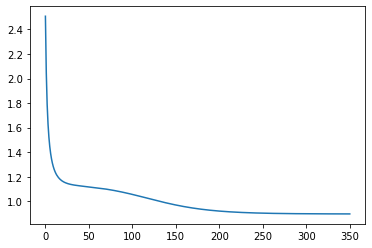

In [47]:
def helmholtz_model(y, t, N0, R1, R2, R3, R4, R5, R6, R7, R8, R9, α, β, θ, ρ, δ, d):
    S, E, C, I, H, U, R, D = y[0],y[1],y[2],y[3],y[4],y[5],y[6],y[7]
    
    dS = - R1 * (C + β * I) / N0 * S
    dE =   R1 * (C + β * I) / N0 * S - R2 * E
    dC = R2 * E - ((1.0 - α) * R3 + α * R9) * C
    dI = (1.0 - α) * R3 * C - ((1.0 - ρ) * R4 + ρ * R6) * I
    dH = ρ * R6 * I - ((1.0 - θ) * R5 + θ * R7) * H
    dU = θ * R7 * H - ((1.0 - δ) * R8 + δ * d) * U
    dR = α * R9 * C + (1.0 - ρ) * R4 * I + (1.0 - θ) * R5 * H + (1.0 - θ) * R8 * dU
    dD = δ * R8 * U
    
    return np.array([dS, dE, dC, dI, dH, dU, dR, dD])

tmax = 360.0
y0 = np.zeros(8) + 1.0
y0[0] = N0
y0[1] = 1.0e5

t  = np.mgrid[0.0:tmax:360j]
args = (N0, R1, R2, R3, R4, R5, R6, R7, R8, R9, α, β, θ, ρ, δ, d)

y = scipy.integrate.odeint(helmholtz_model, y0, t, args=args)

C = y[:,6]
Rt = compute_Rt(C)
plt.plot(Rt)
#plt.axis([None, None, 0.0, 5.0])

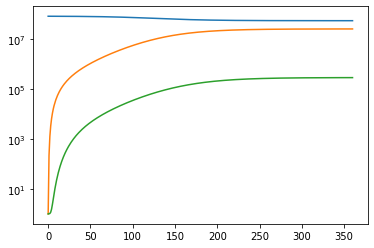

In [48]:
plt.semilogy(t, y[:,0])
plt.semilogy(t, y[:,6])
plt.semilogy(t, y[:,7])

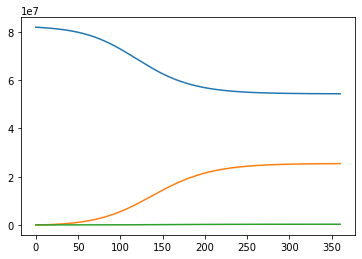

In [49]:
plt.plot(t, y[:,0])
plt.plot(t, y[:,6])
plt.plot(t, y[:,7])

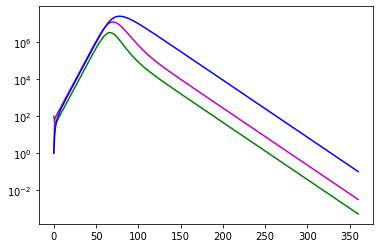

In [5]:
plt.semilogy(t, y[:,1], 'g')
plt.semilogy(t, y[:,2], 'm')
plt.semilogy(t, y[:,3], 'b')


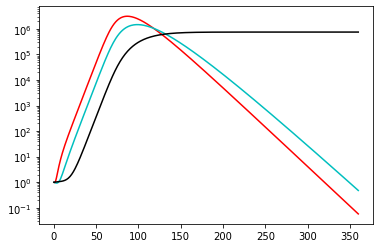

In [6]:
plt.semilogy(t, y[:,4], 'r')
plt.semilogy(t, y[:,5], 'c')
plt.semilogy(t, y[:,7], 'k')

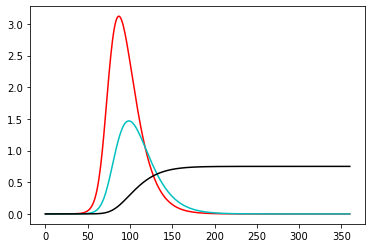

In [7]:
plt.plot(t, y[:,4]*1.0e-6, 'r')
plt.plot(t, y[:,5]*1.0e-6, 'c')
plt.plot(t, y[:,7]*1.0e-6, 'k')